# Star Wars Survey

This project involves analyzing the results of a Star Wars related survey given to 1187 people. This dataset comes from [FiveThirtyEight](https://fivethirtyeight.com/), and the complete dataset can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).



## Cleaning the Data

In [275]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
star_wars = pd.read_csv("/Users/jeremymahoney/Data Science/Datasets/star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[star_wars["RespondentID"].notnull()]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [276]:
# Convert "Yes" and "No" to boolean
bool_map = {"Yes":True, "No":False, float("nan"):False}
star_wars.iloc[:, 1] = star_wars.iloc[:, 1].map(bool_map)
star_wars.iloc[:, 2] = star_wars.iloc[:, 2].map(bool_map)
star_wars.iloc[:, -6] = star_wars.iloc[:, -6].map(bool_map)

In [277]:
# Renaming columns 
star_wars = star_wars.rename(columns={
    "Have you seen any of the 6 films in the Star Wars franchise?":"star_wars_seen",
    "Do you consider yourself to be a fan of the Star Wars film franchise?":"star_wars_fan",
    "Do you consider yourself to be a fan of the Star Trek franchise?":"star_trek_fan"})
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"})
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(lambda x: True if pd.notnull(x) else False)

star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
})
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.head()

,RespondentID,star_wars_seen,star_wars_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,star_trek_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Analysis

### Rankings vs Number of Viewers

One thing that would be interesting to analyze which movie is the most popular based on the rankings. 

<BarContainer object of 6 artists>

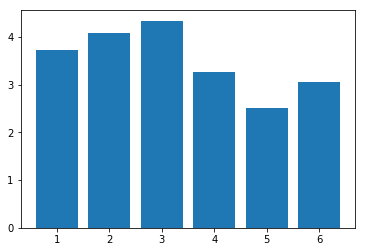

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline
means = star_wars.iloc[:, 9:15].apply(np.mean, axis=0)
plt.bar(range(1, 7), means)

Lower values are better, so in this case, the 5th episode, or The Empire Strikes Back, is clearly the most popular film surveyed.

With the rankings in mind, it would be interesting to find out the number of people surveyed who have seen each film.

<BarContainer object of 6 artists>

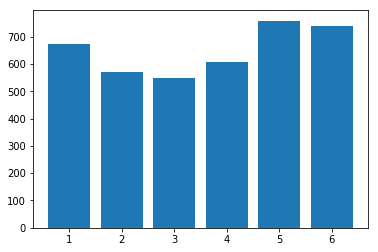

In [279]:
num_seen = star_wars.iloc[:, 3:9].sum(axis=0)
plt.bar(range(1, 7), num_seen)

Unsurpsingly, the most highly rated episode is also the most widely seen. This could be for the obvious reason that it is recommended most highly. However, it's also possible that the fifth episode is widely viewed for another reason, such as that it was advertised especially well. People were forced to rank every episode on the survey, even if they hadn't seen every one of them, so people would likely rank the ones they have seen over those they haven't seen. This could lead to an inflated rating for the fifth episode, regardless of its quality. 

Let's look at the correlation between the number of times a film has been seen and its ranking.

,mean_ranking,num_seen
mean_ranking,1.000000,-0.878126
num_seen,-0.878126,1.000000


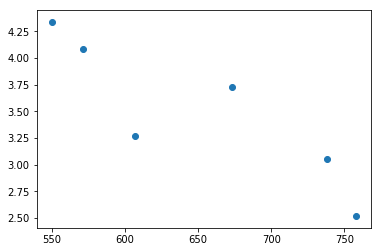

In [280]:
episodes_list = []
for i in range(1, 7):
    episodes_list.append("episode_{}".format(i))
episodes = pd.DataFrame(columns=["mean_ranking", "num_seen"], index=episodes_list)
for i,episode in enumerate(episodes_list, 0):
    episodes.loc[episode, :] = [float(means[i]), float(num_seen[i])]
episodes = episodes.astype("float64")
plt.scatter(episodes["num_seen"], episodes["mean_ranking"])
episodes.corr()

The correlation between the num_seen colum and the mean_ranking column is about -0.88, which is extremely strong. If the causal relationship is primarily that high rankings lead to a large number of viewers, this strong correlation suggests that many people sugest that their friends watch the "best" Star Wars movies rather than watch them in order.

### Preferences amongst Various Groups

We've seen that people tend to prefer Episode 5, and that the more highly ranked episodes are also the more highly viewed ones. It would be interesting to see if different groups of people like different episodes.

The two groups we'll analyze here are:
* Women vs men
* Star Wars fans vs Star Trek fans

We'll start with women vs men.

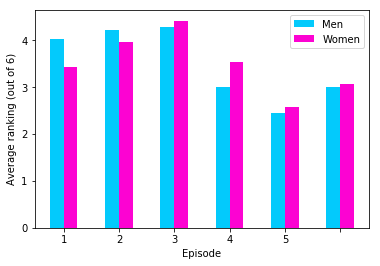

In [281]:
ranking_list = []
for i in range(1, 7):
    ranking_list.append("ranking_{}".format(i))
gender_preferences = star_wars.groupby("Gender")[ranking_list].agg(np.mean)

# Make a grouped bar graph
bar_width = 0.25
r1 = np.arange(gender_preferences.shape[1])
r2 = [x + bar_width for x in r1]
plt.bar(r1, gender_preferences.loc["Male", :], color="#03cafc", width=bar_width, label="Men")
plt.bar(r2, gender_preferences.loc["Female", :], color="#fc03d2", width=bar_width, label="Women")
plt.xlabel("Episode")
plt.xticks([x + bar_width/2 for x in r1], [1, 2, 3, 4, 5])
plt.ylabel("Average ranking (out of 6)")
plt.legend()
plt.show()

Men and women rank the episodes relatively similarly, with men tending to rank the earlier episodes slightly more positively than women. It would be fascinating to use NLP sentiment analysis or computer vision to figure out whether men or women tended to respond more positively to the more violent Star Wars episodes.

Now, let's take a look at Star Wars fans vs Star Trek fans.

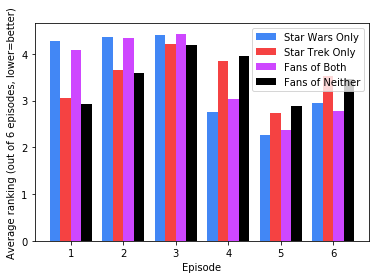

In [283]:
star_wars_only = star_wars[(star_wars["star_wars_fan"]==True) & (star_wars["star_trek_fan"]==False)][ranking_list].apply(np.mean, axis=0)
star_trek_only = star_wars[(star_wars["star_wars_fan"]==False) & (star_wars["star_trek_fan"]==True)][ranking_list].apply(np.mean, axis=0)
both_fans = star_wars[(star_wars["star_wars_fan"]==True) & (star_wars["star_trek_fan"]==True)][ranking_list].apply(np.mean, axis=0)
neither_fans = star_wars[(star_wars["star_wars_fan"]==False) & (star_wars["star_trek_fan"]==False)][ranking_list].apply(np.mean, axis=0)

# Make a grouped bar graph
bar_width = 0.20
r1 = np.arange(len(ranking_list))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]
r4 = [x + 3*bar_width for x in r1]
plt.bar(r1, star_wars_only.tolist(), color="#4287f5", width=bar_width, label="Star Wars Only")
plt.bar(r2, star_trek_only.tolist(), color="#f54242", width=bar_width, label="Star Trek Only")
plt.bar(r3, both_fans.tolist(), color="#ce47ff", width=bar_width, label="Fans of Both")
plt.bar(r4, neither_fans.tolist(), color="#000000", width=bar_width, label="Fans of Neither")
plt.xlabel("Episode")
plt.xticks([x + bar_width*1.5 for x in r1], [1, 2, 3, 4, 5, 6])
plt.ylabel("Average ranking (out of 6 episodes, lower=better)")
plt.legend()
plt.show()

The Star Wars Only category is generally similar to the Fans of Both category, and the Star Trek Only category is generally similar to the Fans of Neither category. Interestingly, the categories that contain fans of Star Wars tend to rate the later movies more favorably than the categories that don't contain Star Wars fans. This could be because later episodes build upon interesting themes previously established in the series that only true fans notice.

## Further Investigation Possibilities

There is a lot more information that could be extracted from this dataset! One interesting analysis to do would be to plot the density of Star Wars fans by location on a map of the US using Basemap.